In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
sns.set()
from matplotlib.animation import FuncAnimation

In [2]:
data=pd.read_csv('ex1data1.txt', sep=',',header=None)

In [3]:
#Detect missing values (NaN in numeric arrays, None/NaN in object arrays)
data.isnull().sum()

0    0
1    0
dtype: int64

In [4]:
data.notnull().count()

0    97
1    97
dtype: int64

In [5]:
#Check that numbers of features iare equal to numbers ob Y
X=np.array(data[0])
Y=np.array(data[1])
print(X.shape == Y.shape)

True


## Gradient decent Method implementaiton

In [6]:
t0, t1 = 0,0

In [7]:
alpha = 0.01
n = 1500  #iterations
l=len(X)

<img src='Eq1.PNG', alt="Drawing" style="width: 300px;"/>

In [8]:
def Y_rev(x,t0,t1):
    b = t0 + t1 * x
    return b

<img src='Eq2.PNG',alt="Drawing" style="width: 250px;"/>
<img src='Eq3.PNG',alt="Drawing" style="width: 500px;"/>

t0 =  -3.6302914394 t1 =  1.16636235034 
 s0/l =  0.0479434379585 s1/l =  -0.00481643837669


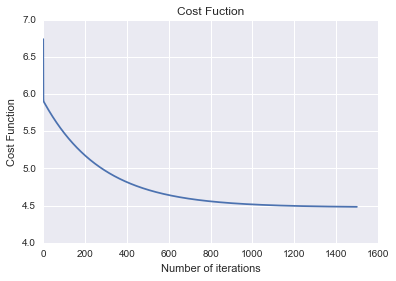

In [9]:
c=[]
T0=[]
T1=[]
for i in range(n):
    s0=((Y_rev(X,t0,t1)-Y)).sum()
    s1=((Y_rev(X,t0,t1)-Y)*X).sum()
    t0=t0-alpha*s0/l
    t1=t1-alpha*s1/l

# Cost computing part, for plot
    Y_new = Y_rev(X,t0,t1)
    J = (Y_new - Y)**2
    c.append(J.sum()/(2*l)) 
    
    T0.append(t0)
    T1.append(t1)
    
print('t0 = ',t0,'t1 = ',t1,'\n','s0/l = ',s0/l,'s1/l = ',s1/l)

#Cost plot
plt.plot(c)
plt.title("Cost Fuction")
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")

In [10]:
#ax = plt.axes(projection='3d')
#ax.scatter(T0, T1, c, 'gray')

In [11]:
Y_new = Y_rev(X,t0,t1)

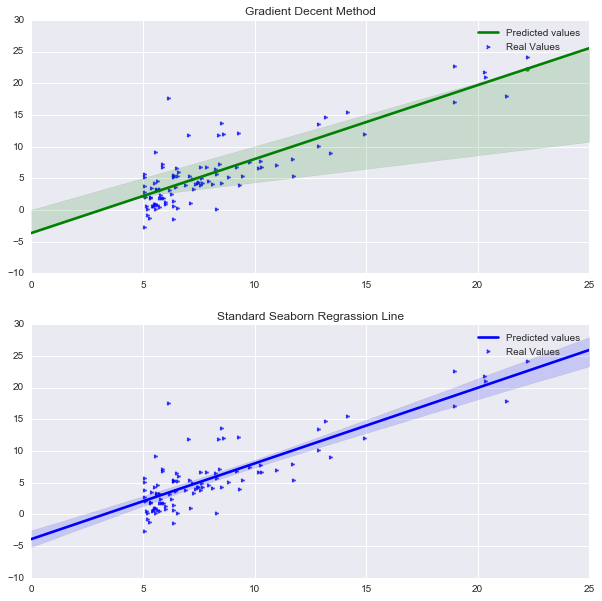

In [12]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
a=np.array([X.min(),X.max()])
b=np.array([X.min()*t1+t0,X.max()*t1+t0])
sns.regplot(x=X, y=Y, color="b", fit_reg=False, marker='4', ax=ax1)
sns.regplot(x=a, y=b, color="g", ax=ax1)
sns.regplot(x=X, y=Y, color="b", fit_reg=True, marker='4', ax=ax2)

ax1.set_title('Gradient Decent Method')
ax1.legend(['Predicted values','Real Values'])

ax2.set_title('Standard Seaborn Regrassion Line')
ax2.legend(['Predicted values','Real Values'])

## Normal Equations

<img src='Eq4.PNG',alt="Drawing" style="width: 250px;"/>

In [13]:
x_t = np.array([np.ones(l),X])

# Matrix mult
a=np.matmul(x_t,x_t.T)

#Matrix Inverse    numpy.linalg.inv
a=np.linalg.inv(a)

b=np.matmul(a,x_t)
c=b=np.matmul(b,Y)

print(c)
print('t0 = ',c[0],'t1 = ',c[1])  

[-3.89578088  1.19303364]
t0 =  -3.89578087831 t1 =  1.19303364419


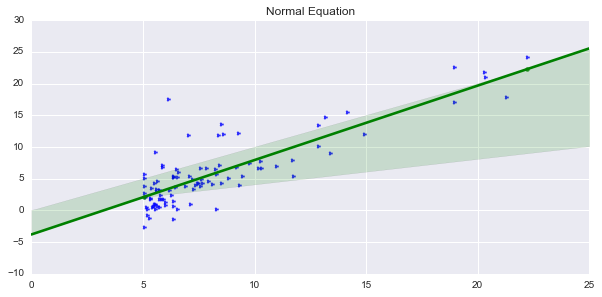

In [14]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)
a=np.array([X.min(),X.max()])
b=np.array([X.min()*c[1]+c[0],X.max()*t1+t0])
sns.regplot(x=X, y=Y, color="b", fit_reg=False, marker='4', ax=ax1)
sns.regplot(x=a, y=b, color="g", ax=ax1)
#sns.regplot(x=X, y=Y, color="b", fit_reg=True, marker='4', ax=ax2)
ax1.set_title('Normal Equation')
#ax2.set_title('Standard Seaborn Regration Line')

# Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
rst collect information on recent houses sold and make a model of housing
prices.
The le ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The rst column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [15]:
data=pd.read_csv('ex1data2.txt', sep=',',header=None)

In [16]:
#Detect missing values (NaN in numeric arrays, None/NaN in object arrays)
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [17]:
data.notnull().count()

0    47
1    47
2    47
dtype: int64

In [18]:
X_1=np.array(data[0])  # Size of the house
X_2=np.array(data[1])  # Number of bedrooms
Y=np.array(data[2])  # Price

#Features normalization
X1norm = (X_1 - np.mean(X_1))/np.std(X_1)
X2norm = (X_2 - np.mean(X_2))/np.std(X_2)
Y_norm = (Y - np.mean(Y))/np.std(Y)

print(X_1.shape == X_2.shape and X_1.shape == Y.shape)

True


## Gradient decent Method implementaiton with multiple variables

In [19]:
t0, t1, t2 = 0.5,0.5,0.5
T=np.array([t0,t1,t2])
alpha = 0.005 #Learning rate
n = 1500  #iterations

l=len(X_1)
#construct the X vector
X = np.array([np.ones(l),X1norm,X2norm]).T

In [20]:
def Y_rev(x,t):
    y = np.matmul(x,t)
    return y

t0 =  0.00027138830147 t1 =  0.867536482233 t2 =  -0.035947979547


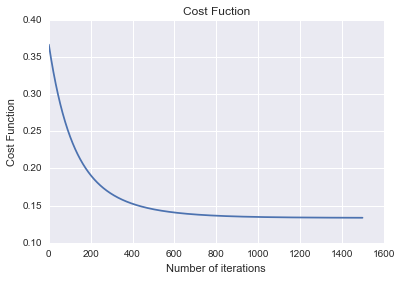

In [21]:
c=[]

for i in range(n):
    Z = (Y_rev(X,T)-Y_norm)
    S=np.matmul(Z,X)
    
# Cost computing part, for plot
    Y_new = Y_rev(X,T)
    J = (Y_new - Y_norm)**2
    c.append(J.sum()/(2*l))
    
    T[0]=T[0]-alpha*S[0]/l
    T[1]=T[1]-alpha*S[1]/l
    T[2]=T[2]-alpha*S[2]/l

 
    
print('t0 = ',T[0],'t1 = ',T[1],'t2 = ',T[2])

#Cost plot
plt.plot(c)
plt.title("Cost Fuction")
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function");

In [22]:
print('The Cost Funciton = ',c[-1])

The Cost Funciton =  0.133658741362


# Additional materials

In [ ]:
# The following code may be ussed for animation of the gradient decent method
'''

from matplotlib import animation, rc
from IPython.display import HTML

from tempfile import NamedTemporaryFile

from matplotlib import animation, rc
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))


t0 = 0
t1 = 0
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(X, Y)
line, = plt.plot(X,Y_rev(X,t0,t1))
plt.close()
def upd():
    global t0, t1
    dydb=((Y_rev(X,t0,t1)-Y)).sum()     #y = (ax+b - y_pred)**2   dydb = 2(ax+b-y_pred)  dyda = 2x(ax+b-y_pred)
    dyda=((Y_rev(X,t0,t1)-Y)*X).sum()
    t0=t0-alpha*dydb/l
    t1=t1-alpha*dyda/l
             
                
def animate(i):
    line.set_ydata(Y_rev(X,t0,t1))
    for i in range(10): upd()
    return line,

ani = FuncAnimation(fig, animate, np.arange(0,40), interval=100, blit=True)
ani.save('the_movie.mp4', writer = 'mencoder', fps=15)
#HTML(ani.to_html5_video())

'''